# The Nordic Prior Knowledge Test in Programming
**Author**: [Sondre Sæther Bolland](https://www.uib.no/personer/Sondre.S%C3%A6ther.Bolland)

**Institution**: Department of Informatics, University of Bergen

**Email**: sondre.bolland@uib.no

## Introduction
The Nordic Prior Knowledge Test in Programming is a tool for assessing students’ programming skill. The test covers the fundamental elements of introductory programming taught at different universities and university colleges in Norway and Sweden. By testing the students in the concepts found in CS1 we aim for instructors to be better able to develop and adapt their courses to this new found prior knowledge.

This Notebook is a dynamic report of the results from 2024, designed to effectivly convey the findings of the test at the start of the semester. The (static) written report will be published sometime fall 2024 here: https://programmeringstesten.no/ 

### Imports

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from scipy import stats

### Data
Before using this notebook two python scripts need to be run. A requirement to run these scripts is to have the csv file with the original dataset: `total.csv`. This must be placed in the `data` folder in the main directory (where this Notebook is located).

`clean_data.py` cleans certain columns for ambigious data and renames columns for analysis.

`grade_submissions.py` grades each question based on the rubric (`rubric.json`).

In [221]:
!python clean_data.py
!python grade_submissions.py

Replace escape characters: dict_items([('&lt;', '<'), ('&gt;', '>'), ('&#61;', '='), ('&#34;', '"'), ('&#43;', '+')])
Replace all institution full names with their shorthand.
Replace all ambigious genders with standardized labels: ['m', 'f'] (other gender identities are not included)
3038 submissions.
Rename columns with simpler titles. Easier to use in analysis.
Removed all genders that are not in: ['m', 'f']. The other gender identities do not have a large enough sample size for valid statistical analysis.
Replace graduation years with: [2024, 2023, Before 2023]
Max score: 40.59999999999997
Submissions to be graded: 3038
Submissions graded.


### Dataset

In [222]:
# Specify the path of the data file
path = "data/"
filename = path + "results.csv"
df = pd.read_csv(filename, on_bad_lines="skip", delimiter=";", encoding="utf8")

# Remove all students who have taken a university level course
df = df[(df['UniversityExperience'] == 'Nei')]

### Filter the dataframe
Do you want to look at a specific subset of students?
Use the next cell to filter the students based on your criteria.

To reset the dataframe, simply run the cell above.

In [223]:
# Filter by institution
specific_institutions = ['UiS'] # 'UiB', 'NTNU', 'UiS', 'HvL', 'UiO', 'Kristiania', 'NMBU', 'OsloMet'
#df = df[(df['Institution'].isin(specific_institutions))]

In [225]:
# Filter by Graduate Year
specific_graduateyears = ['2023', '2024', 'Before 2023'] 
#df = df[(df['GraduateYear'].isin(specific_graduateyears))]

In [226]:
# Filter by Gender
specific_genders = ['f', 'm', ' '] # 'f', 'm', ' '
#df = df[(df['Gender'].isin(specific_genders))]

## Demographics
See the background of the students. Note that there are a large number of submissions that are blank for some of the following items. This is due to the students submitting ambigious answers, which have not been labled correctly by `clean_data.py`.

In [227]:
# Total number of students
print(f"The dataset has {len(df['Total'])} student submissions.")

The dataset has 2661 student submissions.



### Institutions

Institution
NTNU                    928
UiS                     334
UiB                     333
Universitetet i Oslo    328
UiO                     215
NMBU                    206
Kristiania              144
HiOf                     95
HVL                      75
Name: count, dtype: int64


<Axes: ylabel='count'>

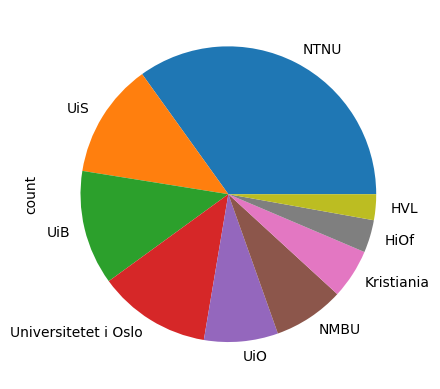

In [228]:
institutions = df.Institution.unique()

institution_column = "Institution"
print(df[institution_column].value_counts())
df[institution_column].value_counts().plot.pie()

### Graduate Year

GraduateYear
Before 2023    1433
2024            674
2023            554
Name: count, dtype: int64


<Axes: ylabel='count'>

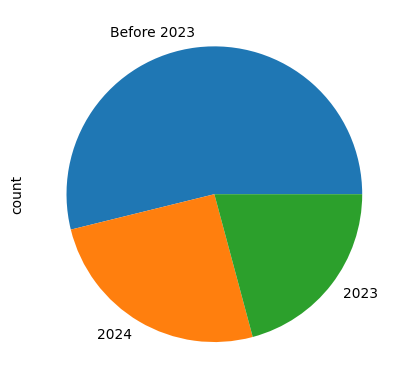

In [229]:
years = df.GraduateYear.unique()

graduateyear_column = "GraduateYear"
print(df[graduateyear_column].value_counts())
df[graduateyear_column].value_counts().plot.pie()

### Gender

Gender
m    1545
f     959
      157
Name: count, dtype: int64
Gender
m    0.580609
f    0.360391
     0.059000
Name: proportion, dtype: float64


<Axes: ylabel='count'>

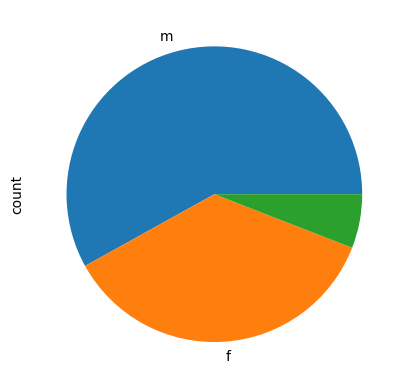

In [230]:
genders = df.Gender.unique()
gender_column = "Gender"

print(df[gender_column].value_counts())
print(df[gender_column].value_counts(normalize=True))
df[gender_column].value_counts().plot.pie()

## Educational Background
What experiences with programming do these students have? 

### Elective Programming Courses
During the secondary school phase, students have the option to take three elective courses in programming: *Information Technology 1* (IT1), *Information Technology 2* (IT2), and *Programming and Modelling X* (PMX). 

In [231]:
# Make new column for NO elective programming course
courses = ['Informasjonsteknologi 1 (IT1)', 'Informasjonsteknologi 2 (IT2)', 'Programmering og modellering X']
df_temp = df[(~df['IT1'].isin(courses))]
df_temp = df_temp[(~df_temp['IT2'].isin(courses))]
df_temp = df_temp[(~df_temp['PMX'].isin(courses))]
df_temp['NoElective'] = ~df_temp['IT1'].isin(courses)

df['NoElective'] = df_temp['NoElective']

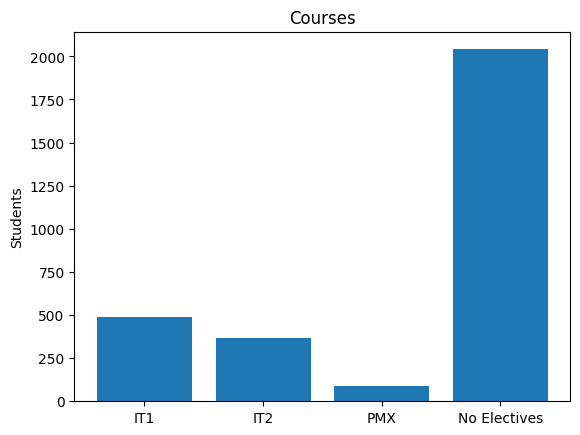

In [232]:
fig, ax = plt.subplots()

courses = ['IT1', 'IT2', 'PMX', 'No Electives']
n_it1 = df['IT1'].value_counts()['Informasjonsteknologi 1 (IT1)']
n_it2 = df['IT2'].value_counts()['Informasjonsteknologi 2 (IT2)']
n_pmx = df['PMX'].value_counts()['Programmering og modellering X']
n_noelectives = df['NoElective'].value_counts()[True]
counts = [n_it1, n_it2, n_pmx, n_noelectives]

ax.bar(courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Math Courses
The most common math courses available in secondary school are:
 * Practical Math 1 (1P)
 * Practical Math 2 (2P)
 * Theoretical Math 1 (1T)
 * Social Science Math 1 (S1)
 * Social Science Math 2 (S2)
 * Natural Science Math 1 (R1)
 * Natural Science Math 2 (R2)

The majority of students who took the test belonged to STEM fields, where the typical admission requirement includes S1 and S2 or R1 mathematics. Certain math-intensive study programs may also demand R2 mathematics. Notably, most students had completed the Natural Science Math courses (see plot below), which is the most advanced option.

[438, 385, 1435, 320, 314, 1502, 1546]


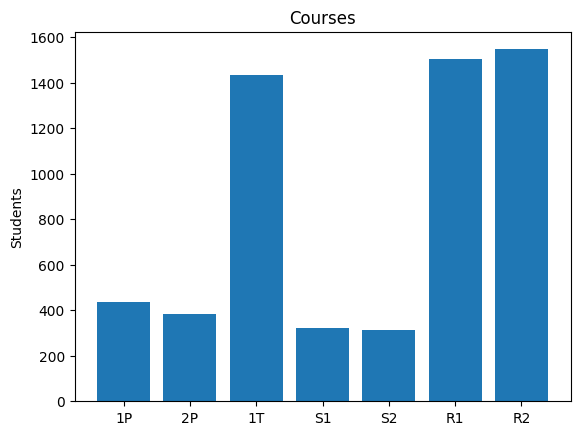

In [233]:
fig, ax = plt.subplots()

courses = ['1P', '2P', '1T', 'S1', 'S2', 'R1', 'R2']
gotten_courses = []
counts = []
for course in courses:
    try:
        count = df[course].value_counts()[course]
        counts.append(count)
        gotten_courses.append(course)
    except:
        continue

print(counts)
ax.bar(gotten_courses, counts)
ax.set_ylabel('Students')
ax.set_title('Courses')

plt.show()

### Experience outside of school
A source of programming knowledge is self-directed learning outside of formal education, where individuals independently explore the field, using resources like books and online materials. The following plot shows the distribution of students who report having at least 30 hours of outside experience with either block based or text based programming.

OutsideExperience
Nei    2098
Ja      555
Name: count, dtype: int64
OutsideExperience
Nei    0.790803
Ja     0.209197
Name: proportion, dtype: float64


<Axes: ylabel='count'>

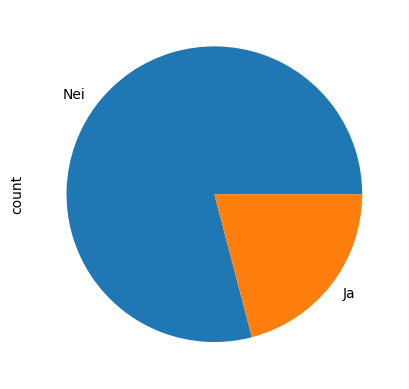

In [234]:
outside_column = "OutsideExperience"

print(df[outside_column].value_counts())
print(df[outside_column].value_counts(normalize=True))
df[outside_column].value_counts().plot.pie()

# Results
In this section of the report, the main results are presented before a review of the background the students have on the various study paths and what connection there is between background and results. Later we take a close look at how well they performed in specific programming tasks to understand their grasp of the different concepts.

In [339]:
# Configurations
bins = 41
max_points = 40.6 # i.e. range
edgecolor = 'red'
alpha = 0.5

## Main Result
A histogram of the total score of the students. Maximum score: 71.

Mean: 16.192
Standard deviation: 12.072


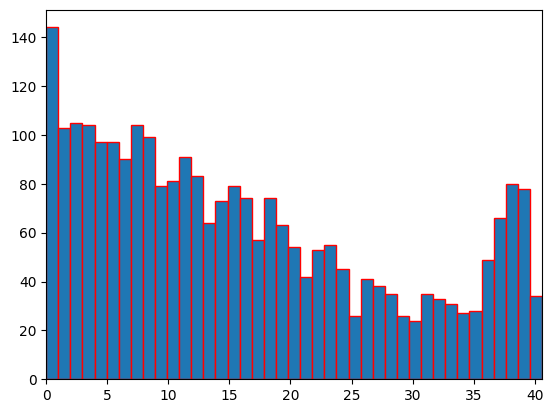

In [340]:
x = df['Total']

mean = df.loc[:, 'Total'].mean()
sd = df.loc[:, 'Total'].std()
print(f'Mean: {round(mean, 3)}')
print(f'Standard deviation: {round(sd, 3)}')

plt.hist(x, edgecolor=edgecolor, bins=bins, range=[0, max_points])
plt.margins(x=0.0001)
fig = plt.gcf()
plt.show()
fig.savefig('plots/allHist.png')

### Did the students find the test hard?
We asked the students to rate the test's difficulty on a Likert scale from 1 (very easy) to 7 (very hard)

<Axes: xlabel='difficulty'>

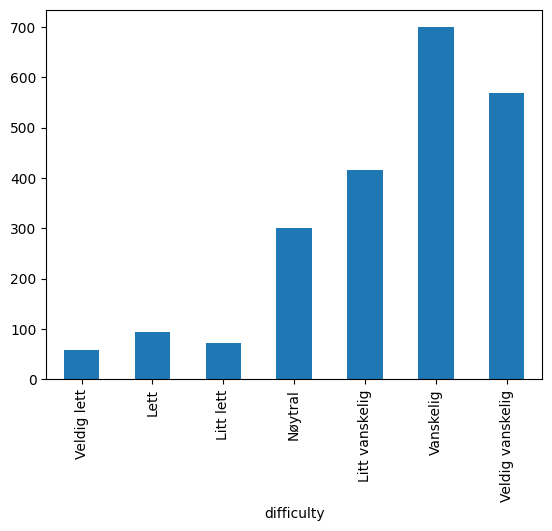

In [341]:
df['difficulty'].value_counts().loc[['Veldig lett', 'Lett', 'Litt lett', 'Nøytral', 'Litt vanskelig', 'Vanskelig', 'Veldig vanskelig']].plot.bar()

In [342]:
def compare_distributions(x, y, x_label, y_label):
    n = len(x)
    mean = x.mean()
    sd = x.std()
    print(f'N students in {x_label}: {n}')
    print(f'Mean of {x_label}: {round(mean, 3)}')
    print(f'Standard deviation of {x_label}: {round(sd, 3)}')
    print()

    n = len(y)
    mean = y.mean()
    sd = y.std()
    print(f'N students in {y_label}: {n}')
    print(f'Mean of {y_label}: {round(mean, 3)}')
    print(f'Standard deviation of {y_label}: {round(sd, 3)}')
    
    plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, weights=np.ones(len(x)) / len(x), range=[0, max_points])
    plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, weights=np.ones(len(y)) / len(y), range=[0, max_points])
    #plt.hist(x, bins=bins, alpha=alpha, edgecolor=edgecolor, label=x_label, range=[0, max_points])
    #plt.hist(y, bins=bins, alpha=alpha, edgecolor=edgecolor, label=y_label, range=[0, max_points])
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.margins(x=0.0001)
    plt.legend(loc='upper right')
    fig = plt.gcf()
    plt.show()
    fig.savefig('plots/graduateYear.png')

## Prior Programming Experience in Secondary School
In the initial segment of the test, we inquired with the students regarding their prior exposure to
programming before to commencing their higher education studies.

### Graduation Year
The educational reforms outlined in LK20 were introduced in the year 2020, resulting in programming becoming a compulsory component solely for those students who graduated in 2023 and onward.

In [343]:
# Significance test
def significane(group1, group2):
    # Perform Mann-Whitney U Test
    stat, p_value = stats.ranksums(group1, group2)
    
    # Print the test statistic and p-value
    print(f"Wilcox Rank-sum test: {stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation of p-value
    a = 0.05
    if p_value < a:
        print("Reject the null hypothesis: There is a significant difference between the two groups.")
    else:
        print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

N students in 2023 and 2024: 1228
Mean of 2023 and 2024: 20.254
Standard deviation of 2023 and 2024: 11.807

N students in Before 2023: 1433
Mean of Before 2023: 12.71
Standard deviation of Before 2023: 11.179


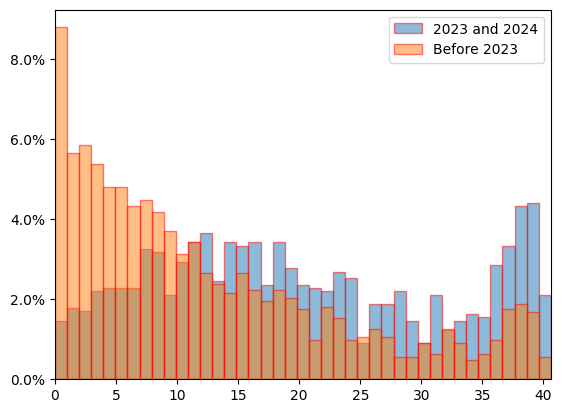

Wilcox Rank-sum test: 16.990871684679288
P-value: 9.595255133044605e-65
Reject the null hypothesis: There is a significant difference between the two groups.


In [391]:
years = df['GraduateYear']
x = df[(years.isin(['2023', '2024']))]['Total']
y = df[(~years.isin(['2023', '2024']))]['Total']
y = y[~np.isnan(y)]

x_label = '2023 and 2024'
y_label = 'Before 2023'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Mathematics Courses

N students in 2P: 385
Mean of 2P: 9.577
Standard deviation of 2P: 9.339

N students in R2: 1546
Mean of R2: 19.52
Standard deviation of R2: 12.258


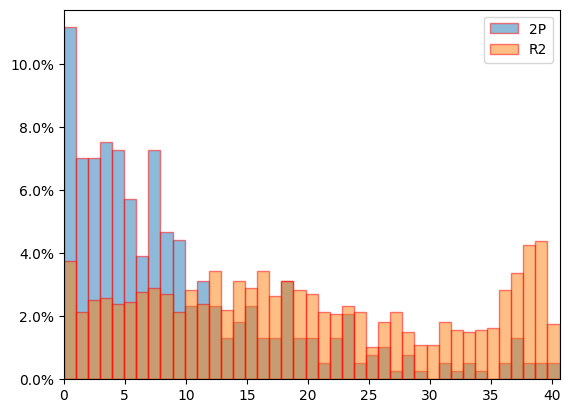

Wilcox Rank-sum test: -14.74096135437084
P-value: 3.517417433685063e-49
Reject the null hypothesis: There is a significant difference between the two groups.


In [345]:
x = df[(df['2P'].isin(['2P']))]['Total']
y = df[(df['R2'].isin(['R2']))]['Total']
y = y[~np.isnan(y)]

x_label = '2P'
y_label = 'R2'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Programming Electives

N students in IT2: 369
Mean of IT2: 28.504
Standard deviation of IT2: 11.293

N students in NoElective: 2041
Mean of NoElective: 13.423
Standard deviation of NoElective: 10.528


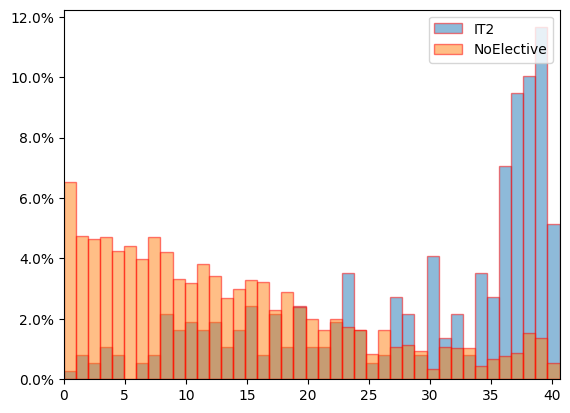

Wilcox Rank-sum test: 19.858770418403484
P-value: 9.25487105046367e-88
Reject the null hypothesis: There is a significant difference between the two groups.


In [346]:
x = df[(df['IT2'].isin(['Informasjonsteknologi 2 (IT2)']))]['Total']
y = df[(df['NoElective'].isin([True]))]['Total']
y = y[~np.isnan(y)]

x_label = 'IT2'
y_label = 'NoElective'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### Outside Experience

N students in Outside experience: 555
Mean of Outside experience: 26.684
Standard deviation of Outside experience: 11.712

N students in No outside experience: 2098
Mean of No outside experience: 13.405
Standard deviation of No outside experience: 10.542


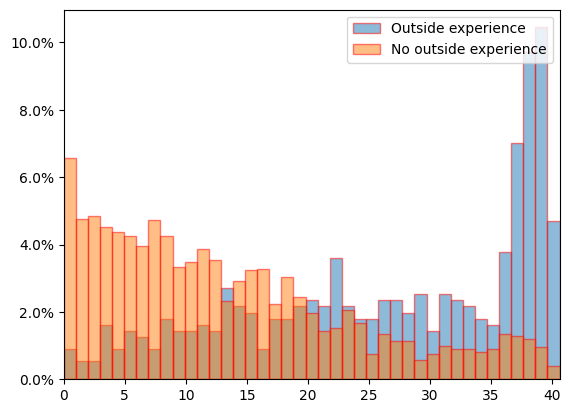

Wilcox Rank-sum test: 21.437897799338103
P-value: 5.922938251518678e-102
Reject the null hypothesis: There is a significant difference between the two groups.


In [347]:
x = df[(df['OutsideExperience'].isin(['Ja']))]['Total']
y = df[(df['OutsideExperience'].isin(['Nei']))]['Total']
y = y[~np.isnan(y)]

x_label = 'Outside experience'
y_label = 'No outside experience'

compare_distributions(x, y, x_label, y_label)
significane(x, y)

### How many students do not need introductory programming?
The students who perform very well on this test might not need CS1. If we set an (arbitrary) point threshold we can get an indication of how many students can perhaps move on to more advanced courses.

In [392]:
threshold = max_points - 4
x = df[df['Total'] > threshold]
n = len(x)
percentage = round((n/len(df))*100, 2)

print(f'Number of students with a score over {threshold}: {n} ({percentage}%)')

Number of students with a score over 36.6: 258 (9.7%)


### Gender

N students in women: 959
Mean of women: 11.741
Standard deviation of women: 10.177

N students in men: 1545
Mean of men: 18.863
Standard deviation of men: 12.338


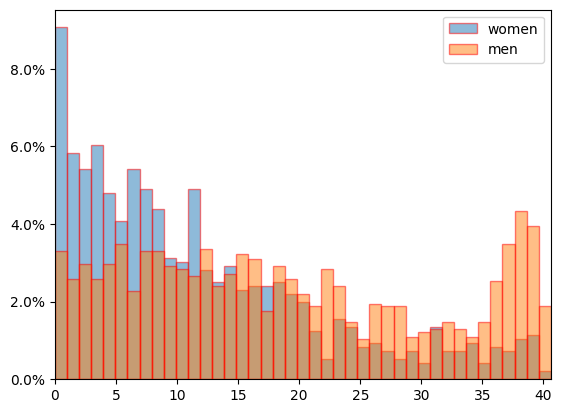

In [393]:
x = df[(df['Gender'] == 'f')]['Total']
y = df[(df['Gender'] == 'm')]['Total']

x_label = 'women'
y_label = 'men'

compare_distributions(x, y, x_label, y_label)

# Programming Tasks
Each task featured in the test pertained to a designated concept category. The following cells show the number of correct answers and the most common answers for each task.

## Correctness rate for each concept category
Below you can find the percentage of accurate responses achieved by the students for each concept.

Note that performance within each category may not exclusively reflect the students’ mastery of that programming concept. Variability in task difficulty plays a substantial role, with some tasks naturally being easier than others, irrespective of the underlying concept.

In [350]:
def correctnes_rate(columns, category, task_weight=1):
    correct_answer_rate = 0
    for column in columns:
        points_column = column + "_points"
        task_mean = df.loc[:, points_column].mean()
        correct_answer_rate += task_mean
    correct_answer_rate /= len(columns)*task_weight
    print(f'{category:15s} {correct_answer_rate*100:3.2f} %')

In [394]:
print("The students have the following average correctness rate for each concept category:")

# Datatypes
datatype_columns = ['datatypes1', 'datatypes2', 'datatypes3', 'datatypes4']
correctnes_rate(datatype_columns, "Datatypes")

# Operators
operator_columns = ['Operators1', 'Operators2', 'Operators3', 'Operators4', 'Operators5']
correctnes_rate(operator_columns, "Operators")

# Booleans
boolean_columns = ["100 == 100", "2 > 7", "(10 + 3) >= 13", "(10*2) < 9", "(1 + 3) < (2*3)", "(10.3 + 9) == (10.3 + 10)", "100 != 100", "(5 < 7) and (4 > 5)", "(5 < 7) or (4 > 5)", "(3 < 7) and (7 < 9)", "(3 < 7) or (7 < 9)", "not (100 != 100)", "True != True", "True and False", "True or False" , "True and True", "True or True", "not (True != True)", "n < 10", "100 == n", "(n < 7) and (4 > n)", "(n < 7) or (4 > n)", "n <= 5", "not (n < 10)"]
correctnes_rate(boolean_columns, "Booleans", task_weight=0.2)

# Variables
variable_columns = ["Variables1a", "Variables1b", "Variables2a", "Variables2b", "Variables3a", "Variables3b", "Variables4a", "Variables4b", "Variables5a", "Variables5b", "Variables5c", "Variables6a", "Variables6b", "Variables6c"]
correctnes_rate(variable_columns, "Variables", task_weight=0.2)

# Conditionals
conditional_columns = ["Conditionals1", "Conditionals2", "Conditionals3", "Conditionals4"]
correctnes_rate(conditional_columns, "Conditionals")

# Loops
loop_columns = ["Loops1", "Loops2", "Loops3", "Loops4", "Loops5", "Loops6", "Loops7"]
correctnes_rate(loop_columns, "Loops")

# Lists
list_columns = ["Lists1", "Lists2", "Lists3a", "Lists3b"]
correctnes_rate(list_columns, "Lists")

# Functions
function_columns = ["Functions1", "Functions2", "Functions3", "Functions4", "Functions5", "Functions6", "Functions7", "Functions8", "Functions9"]
correctnes_rate(function_columns, "Functions")

all_columns = datatype_columns + operator_columns + boolean_columns + variable_columns + conditional_columns + loop_columns + list_columns + function_columns

The students have the following average correctness rate for each concept category:
Datatypes       51.46 %
Operators       53.25 %
Booleans        60.67 %
Variables       49.58 %
Conditionals    55.06 %
Loops           27.00 %
Lists           31.79 %
Functions       20.07 %


## Tasks
To gain a deeper understanding of the students’ knowledge and comprehension of specific programming concepts, it is important to analyze their performance on these concepts. 

In [352]:
def print_task_result(task_column, df, n_answers=5, verbose_correct_answers=True):
    '''
    Print number of correct (1) and incorrect (0) responses.
    Print the top 5 most common answers.
    '''
    if verbose_correct_answers:
        task_point_column = task_column + "_points"
        print("Number of correct responses:")
        print(df[task_point_column].value_counts())
        print()
    
    print(f"Top {n_answers} most common answers:")
    try:
        print(df[task_column].value_counts()[:n_answers])
    except:
        print(df[task_column].value_counts())

# Datatypes
What datatype do the following variables have?
```python
a = 123
b = 1.23
c = '123'
d = [1, 2, 3]
```

In [353]:
print_task_result("datatypes1", df, 6, True)
print()
print_task_result("datatypes2", df, 6, True)
print()
print_task_result("datatypes3", df, 6, True)
print()
print_task_result("datatypes4", df, 6, True)

Number of correct responses:
datatypes1_points
0    1387
1    1274
Name: count, dtype: int64

Top 6 most common answers:
datatypes1
int             1274
Jeg vet ikke     943
str              153
float            150
list              86
bool              44
Name: count, dtype: int64

Number of correct responses:
datatypes2_points
0    1378
1    1283
Name: count, dtype: int64

Top 6 most common answers:
datatypes2
float           1283
Jeg vet ikke     961
int              182
str              131
bool              68
list              17
Name: count, dtype: int64

Number of correct responses:
datatypes3_points
0    1520
1    1141
Name: count, dtype: int64

Top 6 most common answers:
datatypes3
str             1141
Jeg vet ikke    1126
int              124
float            111
bool              97
list              34
Name: count, dtype: int64

Number of correct responses:
datatypes4_points
1    1779
0     882
Name: count, dtype: int64

Top 6 most common answers:
datatypes4
list         

# Operators

### Operators 1
What is the value of `result`?
```python
a = 12
result = a + a
```

In [354]:
print_task_result("Operators1", df, 4, True)

Number of correct responses:
Operators1_points
1    2134
0     527
Name: count, dtype: int64

Top 4 most common answers:
Operators1
24.0            2134
I don't know     352
12.0              28
6.0               17
Name: count, dtype: int64


### Operators 2
What is the value of `result`?
```python
a = 12
b = 1.23 

result = b + a
```

In [355]:
print_task_result("Operators2", df, 4, True)

Number of correct responses:
Operators2_points
1    1781
0     880
Name: count, dtype: int64

Top 4 most common answers:
Operators2
13.23           1781
I don't know     494
13.0              17
12.23              6
Name: count, dtype: int64


### Operators 3
What is the value of `result`?
```python
c = '123'
result = c + c
```

In [356]:
print_task_result("Operators3", df, 4, True)

Number of correct responses:
Operators3_points
0    1865
1     796
Name: count, dtype: int64

Top 4 most common answers:
Operators3
123123.0        796
I don't know    710
246.0           249
123.0            21
Name: count, dtype: int64


### Operators 4
What is printed here?
```python
n = 0
n = n + 1
n = n + 1

print(n)
```

In [357]:
print_task_result("Operators4", df, 4, True)

Number of correct responses:
Operators4_points
1    1614
0    1047
Name: count, dtype: int64

Top 4 most common answers:
Operators4
2.0             1614
I don't know     606
1.0              149
3.0               47
Name: count, dtype: int64


### Operators 5
What is printed here?
```python
n = 'b'
n = n + 'c'
n = n + 'a'

print(n)
```

In [358]:
print_task_result("Operators5", df, 4, True)

Number of correct responses:
Operators5_points
0    1901
1     760
Name: count, dtype: int64

Top 4 most common answers:
Operators5
I don't know    1039
bca              737
abc               27
b+c+a             24
Name: count, dtype: int64


# Variables

### Variables 1
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
```

In [359]:
print_task_result("Variables1a", df)
print_task_result("Variables1b", df)

Number of correct responses:
Variables1a_points
0.2    1468
0.0    1193
Name: count, dtype: int64

Top 5 most common answers:
Variables1a
 20.0      1468
 10.0       166
 30.0        11
 1.0          6
 15.0         4
 1020.0       3
 0.5          1
 10.2         1
 220.0        1
 80.0         1
-10.0         1
 2.0          1
 40.0         1
Name: count, dtype: int64
Number of correct responses:
Variables1b_points
0.2    1492
0.0    1169
Name: count, dtype: int64

Top 5 most common answers:
Variables1b
20.0            1492
I don't know    1001
10.0             121
2.0                5
30.0               5
Name: count, dtype: int64


### Variables 2
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
```

In [360]:
print_task_result("Variables2a", df)
print_task_result("Variables2b", df)

Number of correct responses:
Variables2a_points
0.2    1420
0.0    1241
Name: count, dtype: int64

Top 5 most common answers:
Variables2a
10.0    1420
20.0     152
2.0        4
30.0       4
0.5        2
15.0       2
40.0       1
0.0        1
1.0        1
80.0       1
50.0       1
Name: count, dtype: int64
Number of correct responses:
Variables2b_points
0.2    1361
0.0    1300
Name: count, dtype: int64

Top 5 most common answers:
Variables2b
10.0            1361
I don't know    1049
20.0             201
30.0               5
1.0                4
Name: count, dtype: int64


### Variables 3
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

a = b
b = a
```

In [361]:
print_task_result("Variables3a", df)
print_task_result("Variables3b", df)

Number of correct responses:
Variables3a_points
0.2    1368
0.0    1293
Name: count, dtype: int64

Top 5 most common answers:
Variables3a
 20.0    1368
 10.0     138
 30.0       5
-10.0       2
 29.0       1
 1.0        1
 0.5        1
 0.0        1
 15.0       1
 40.0       1
 2.0        1
Name: count, dtype: int64
Number of correct responses:
Variables3b_points
0.0    1456
0.2    1205
Name: count, dtype: int64

Top 5 most common answers:
Variables3b
20.0            1205
I don't know    1119
10.0             289
30.0               4
2.0                1
Name: count, dtype: int64


### Variables 4
What is the value of variables `a` and `b`?
```python
a = 10
b = 20

b = a
a = b
```

In [362]:
print_task_result("Variables4a", df)
print_task_result("Variables4b", df)

Number of correct responses:
Variables4a_points
0.0    1434
0.2    1227
Name: count, dtype: int64

Top 5 most common answers:
Variables4a
 10.0    1227
 20.0     232
 30.0       5
 40.0       3
 1.0        2
 10.2       1
-10.0       1
 50.0       1
 2.0        1
Name: count, dtype: int64
Number of correct responses:
Variables4b_points
0.0    1377
0.2    1284
Name: count, dtype: int64

Top 5 most common answers:
Variables4b
10.0            1284
I don't know    1149
20.0             175
30.0               4
2.0                2
Name: count, dtype: int64


### Variables 5
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = b
b = c
```

In [363]:
print_task_result("Variables5a", df)
print_task_result("Variables5b", df)
print_task_result("Variables5c", df)

Number of correct responses:
Variables5a_points
0.2    1340
0.0    1321
Name: count, dtype: int64

Top 5 most common answers:
Variables5a
20.0    1340
10.0      78
30.0      77
1.0        3
29.0       2
0.0        1
60.0       1
50.0       1
40.0       1
2.0        1
15.0       1
Name: count, dtype: int64
Number of correct responses:
Variables5b_points
0.2    1399
0.0    1262
Name: count, dtype: int64

Top 5 most common answers:
Variables5b
 30.0     1399
 20.0       54
 10.0       36
 2.0         2
 15.0        2
 3.0         1
-10.0        1
 1.0         1
 120.0       1
 50.0        1
 60.0        1
Name: count, dtype: int64
Number of correct responses:
Variables5c_points
0.2    1390
0.0    1271
Name: count, dtype: int64

Top 5 most common answers:
Variables5c
30.0            1390
I don't know    1125
10.0              40
20.0              39
60.0               4
Name: count, dtype: int64


### Variables 6
What is the value of variables `a`, `b` and `c`?
```python
a = 10
b = 20
c = 30

a = c
b = a
c = b
```

In [364]:
print_task_result("Variables6a", df)
print_task_result("Variables6b", df)
print_task_result("Variables6c", df)

Number of correct responses:
Variables6a_points
0.2    1335
0.0    1326
Name: count, dtype: int64

Top 5 most common answers:
Variables6a
30.0    1335
20.0      61
10.0      42
0.0        3
60.0       2
6.0        1
5.0        1
Name: count, dtype: int64
Number of correct responses:
Variables6b_points
0.0    1566
0.2    1095
Name: count, dtype: int64

Top 5 most common answers:
Variables6b
 30.0     1095
 10.0      286
 20.0       52
 0.0         2
-20.0        1
 40.0        1
 140.0       1
-10.0        1
 60.0        1
Name: count, dtype: int64
Number of correct responses:
Variables6c_points
0.0    1576
0.2    1085
Name: count, dtype: int64

Top 5 most common answers:
Variables6c
I don't know    1160
30.0            1085
20.0             251
10.0              97
60.0               3
Name: count, dtype: int64


## Booleans

### Booleans 1
What do these boolean expressions evaluate to?

In [365]:
print_task_result("100 == 100", df, 3, False)
print()
print_task_result("2 > 7", df, 3, False)
print()
print_task_result("(10 + 3) >= 13", df, 3, False)
print()
print_task_result("(10*2) < 9", df, 3, False)
print()
print_task_result("(1 + 3) < (2*3)", df, 3, False)
print()
print_task_result("(10.3 + 9) == (10.3 + 10)", df, 3, False)

Top 3 most common answers:
100 == 100
True            1828
Jeg vet ikke     465
TRUE             244
Name: count, dtype: int64

Top 3 most common answers:
2 > 7
False           2029
FALSE            279
Jeg vet ikke     213
Name: count, dtype: int64

Top 3 most common answers:
(10 + 3) >= 13
True            1684
Jeg vet ikke     353
False            298
Name: count, dtype: int64

Top 3 most common answers:
(10*2) < 9
False           1973
FALSE            276
Jeg vet ikke     239
Name: count, dtype: int64

Top 3 most common answers:
(1 + 3) < (2*3)
True            1933
TRUE             266
Jeg vet ikke     260
Name: count, dtype: int64

Top 3 most common answers:
(10.3 + 9) == (10.3 + 10)
False           1795
Jeg vet ikke     487
FALSE            242
Name: count, dtype: int64


### Booleans 2
What do these boolean expressions evaluate to?

In [366]:
print_task_result("100 != 100", df, 3, False)
print()
print_task_result("(5 < 7) and (4 > 5)", df, 3, False)
print()
print_task_result("(5 < 7) or (4 > 5)", df, 3, False)
print()
print_task_result("(3 < 7) and (7 < 9)", df, 3, False)
print()
print_task_result("(3 < 7) or (7 < 9)", df, 3, False)
print()
print_task_result("not (100 != 100)", df, 3, False)

Top 3 most common answers:
100 != 100
False           1219
Jeg vet ikke    1096
FALSE            174
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) and (4 > 5)
False           1696
Jeg vet ikke     572
FALSE            236
Name: count, dtype: int64

Top 3 most common answers:
(5 < 7) or (4 > 5)
True            1153
Jeg vet ikke     756
False            473
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) and (7 < 9)
True            1687
Jeg vet ikke     586
TRUE             236
Name: count, dtype: int64

Top 3 most common answers:
(3 < 7) or (7 < 9)
True            1360
Jeg vet ikke     744
False            268
Name: count, dtype: int64

Top 3 most common answers:
not (100 != 100)
Jeg vet ikke    1444
True             872
False            133
Name: count, dtype: int64


### Booleans 3
What do these boolean expressions evaluate to?

In [367]:
print_task_result("True != True", df, 3, False)
print()
print_task_result("True and False", df, 3, False)
print()
print_task_result("True or False", df, 3, False)
print()
print_task_result("True and True", df, 3, False)
print()
print_task_result("True or True", df, 3, False)
print()
print_task_result("not (True != True)", df, 3, False)

Top 3 most common answers:
True != True
Jeg vet ikke    1340
False            978
FALSE            141
Name: count, dtype: int64

Top 3 most common answers:
True and False
Jeg vet ikke    1323
False            946
True             163
Name: count, dtype: int64

Top 3 most common answers:
True or False
Jeg vet ikke    1270
True            1034
TRUE             147
Name: count, dtype: int64

Top 3 most common answers:
True and True
Jeg vet ikke    1158
True            1125
TRUE             160
Name: count, dtype: int64

Top 3 most common answers:
True or True
Jeg vet ikke    1205
True             901
False            306
Name: count, dtype: int64

Top 3 most common answers:
not (True != True)
Jeg vet ikke    1541
True             725
False            188
Name: count, dtype: int64


### Booleans 4
Given the variable `n = 5`, what do these boolean expressions evaluate to?

In [368]:
print_task_result("n < 10", df, 3, False)
print()
print_task_result("100 == n", df, 3, False)
print()
print_task_result("(n < 7) and (4 > n)", df, 3, False)
print()
print_task_result("(n < 7) or (4 > n)", df, 3, False)
print()
print_task_result("n <= 5", df, 3, False)
print()
print_task_result("not (n < 10)", df, 3, False)

Top 3 most common answers:
n < 10
True            1816
Jeg vet ikke     353
TRUE             264
Name: count, dtype: int64

Top 3 most common answers:
100 == n
False           1681
Jeg vet ikke     634
FALSE            224
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) and (4 > n)
False           1666
Jeg vet ikke     519
FALSE            224
Name: count, dtype: int64

Top 3 most common answers:
(n < 7) or (4 > n)
True            1285
Jeg vet ikke     643
False            430
Name: count, dtype: int64

Top 3 most common answers:
n <= 5
True            1597
Jeg vet ikke     588
TRUE             219
Name: count, dtype: int64

Top 3 most common answers:
not (n < 10)
Jeg vet ikke    1083
False           1064
True             258
Name: count, dtype: int64


## Conditionals

### Conditionals 1
What does this code snippet print?

```python
if 2 > 7:
    print(1)
```

In [369]:
print_task_result("Conditionals1", df)

Number of correct responses:
Conditionals1_points
1    1750
0     911
Name: count, dtype: int64

Top 5 most common answers:
Conditionals1
Ingenting       1750
Jeg vet ikke     505
1                373
Name: count, dtype: int64


### Conditionals 2
What does this code snippet print?

```python
if 100 != 100:
    print(1)
else:
    print(2)
```

In [370]:
print_task_result("Conditionals2", df)

Number of correct responses:
Conditionals2_points
0    1395
1    1266
Name: count, dtype: int64

Top 5 most common answers:
Conditionals2
2               1266
Jeg vet ikke    1018
1                184
1 og 2           103
Ingenting         55
Name: count, dtype: int64


### Conditionals 3
What does this code snippet print?

```python
if (10*2) < 9:
    print(1)
elif 100 == 100:
    print(2)
else:
    print(3)
```

In [371]:
print_task_result("Conditionals3", df)

Number of correct responses:
Conditionals3_points
1    1423
0    1238
Name: count, dtype: int64

Top 5 most common answers:
Conditionals3
2               1423
Jeg vet ikke     773
2 og 3           155
3                 73
1 og 2            70
Name: count, dtype: int64


### Conditionals 4
What does this code snippet print?

```python
if 100 == 100:
    print(1)
if (1 + 3) < (2*3):
    print(2)
else:
    print(3)
```

In [372]:
print_task_result("Conditionals4", df)

Number of correct responses:
Conditionals4_points
1    1422
0    1239
Name: count, dtype: int64

Top 5 most common answers:
Conditionals4
1 og 2          1422
Jeg vet ikke     776
1                170
1, 2 og 3         76
2                 60
Name: count, dtype: int64


## Loops

### Loops 1
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 1

print(n)
```

In [373]:
print_task_result("Loops1", df)

Number of correct responses:
Loops1_points
0    1843
1     818
Name: count, dtype: int64

Top 5 most common answers:
Loops1
I don't know    841
10.0            818
1.0             354
9.0             266
123456789.0     145
Name: count, dtype: int64


### Loops 2
What does this code snippet print?

```python
n = 0
while n < 10:
    n = n + 2

print(n)
```

In [374]:
print_task_result("Loops2", df)

Number of correct responses:
Loops2_points
0    1912
1     749
Name: count, dtype: int64

Top 5 most common answers:
Loops2
I don't know    863
10.0            749
2.0             346
8.0             239
2468.0          143
Name: count, dtype: int64


### Loops 3
What does this code snippet print?

```python
n = 100
while n < 10:
    n = n + 2

print(n)
```

In [375]:
print_task_result("Loops3", df)

Number of correct responses:
Loops3_points
0    1487
1    1174
Name: count, dtype: int64

Top 5 most common answers:
Loops3
100             1174
I don't know    1084
0                 99
102               81
2                 19
Name: count, dtype: int64


### Loops 4
What does this code snippet print?

```python
n = 0
while (n < 7) and (4 > n):
    n = n + 1

print(n)
```

In [376]:
print_task_result("Loops4", df)

Number of correct responses:
Loops4_points
0    1999
1     662
Name: count, dtype: int64

Top 5 most common answers:
Loops4
I don't know    1085
4.0              662
1.0              243
3.0              209
0.0              117
Name: count, dtype: int64


### Loops 5
What does this code snippet print?

```python
n = 0
ls = [1, 1, 3]
for e in ls:
    n = n + e

print(n)
```

In [377]:
print_task_result("Loops5", df)

Number of correct responses:
Loops5_points
0    2027
1     634
Name: count, dtype: int64

Top 5 most common answers:
Loops5
I don't know    1761
5.0              634
0.0               45
3.0               32
113.0             24
Name: count, dtype: int64


### Loops 6
What does this code snippet print?

```python
n = 0
ls = [-1, 4, -3, 0, -10, 5]
for e in ls:
    if e > 0:
        n = n + e

print(n)
```

In [378]:
print_task_result("Loops6", df)

Number of correct responses:
Loops6_points
0    2123
1     538
Name: count, dtype: int64

Top 5 most common answers:
Loops6
I don't know    1807
9.0              538
0.0               62
-5.0              28
5.0               20
Name: count, dtype: int64


## Lists

### Lists 1
What does this code snippet print?

```python
ls = [10, 20, 30]
print(ls[1])
```

In [379]:
print_task_result("Lists1", df)

Number of correct responses:
Lists1_points
0    1933
1     728
Name: count, dtype: int64

Top 5 most common answers:
Lists1
I don't know    1185
20.0             728
10.0             582
102030.0          50
60.0              14
Name: count, dtype: int64


### Lists 2
What does this code snippet print?

```python
ls = [10, 20, 30]
ls[1] = ls[1] + 5

print(ls[1])
```

In [380]:
print_task_result("Lists2", df)

Number of correct responses:
Lists2_points
0    1946
1     715
Name: count, dtype: int64

Top 5 most common answers:
Lists2
I don't know    1251
25.0             715
15.0             521
152535.0          20
65.0              12
Name: count, dtype: int64


### Lists 3
What does this code snippet print?

```python
a = [10, 20, 30]
b = [5, 15, 25]

b[1] = a[1] + b[1]

print(a)
print(b)
```

In [381]:
print_task_result("Lists3a", df)
print_task_result("Lists3b", df)

Number of correct responses:
Lists3a_points
0    1372
1    1289
Name: count, dtype: int64

Top 5 most common answers:
Lists3a
[10, 20, 30]    1289
Jeg vet ikke    1074
[15, 35, 55]      61
[5, 15, 25]       32
[10, 35, 30]      15
Name: count, dtype: int64
Number of correct responses:
Lists3b_points
0    2009
1     652
Name: count, dtype: int64

Top 5 most common answers:
Lists3b
Jeg vet ikke    1338
[5, 35, 25]      652
[15, 35, 55]     341
[5, 15, 25]      146
[10, 35, 30]      29
Name: count, dtype: int64


## Functions

### Functions 1
What does this code snippet print?

```python
def f(a, b):
    return a + b

print(f(5, 10))
```

In [382]:
print_task_result("Functions1", df)

Number of correct responses:
Functions1_points
0    1547
1    1114
Name: count, dtype: int64

Top 5 most common answers:
Functions1
I don't know    1397
15.0            1114
5.1               27
510.0             14
10.0               2
Name: count, dtype: int64


### Functions 2
What does this code snippet print?

```python
def f(a):
    if a:
        return 1
    else:
        return 2

print(f(100 == 100))
```

In [383]:
print_task_result("Functions2", df)

Number of correct responses:
Functions2_points
0    1907
1     754
Name: count, dtype: int64

Top 5 most common answers:
Functions2
I don't know    1665
1.0              754
2.0               71
100.0             56
99.0               2
Name: count, dtype: int64


### Functions 3
What does this code snippet print?

```python
def f():
    if 100 == 100:
        return 1
    if (1 + 3) < (2*3):
        return 2
    else:
        return 3

print(f())
```

In [384]:
print_task_result("Functions3", df)

Number of correct responses:
Functions3_points
0    2293
1     368
Name: count, dtype: int64

Top 5 most common answers:
Functions3
I don't know    1648
1.0              368
12.0             219
1.2              127
2.0               75
Name: count, dtype: int64


### Functions 4
What does this code snippet print?

```python
def f(n, a):
    if a:
        n = n + 1
    return n

print(f(5, (10*2) < 9))
```

In [385]:
print_task_result("Functions4", df)

Number of correct responses:
Functions4_points
0    2168
1     493
Name: count, dtype: int64

Top 5 most common answers:
Functions4
I don't know    1933
5.0              493
6.0               48
0.0               14
1.0                4
Name: count, dtype: int64


### Functions 5
What does this code snippet print?

```python
def f(n):
    while n < 10:
        n = n + 1
    return n

print(f(5))
```

In [386]:
print_task_result("Functions5", df)

Number of correct responses:
Functions5_points
0    2105
1     556
Name: count, dtype: int64

Top 5 most common answers:
Functions5
I don't know    1490
10.0             556
6.0              215
9.0               92
5.0               85
Name: count, dtype: int64


### Functions 6
What does this code snippet print?

```python
def f(s, ls):
    for e in ls:
        s = s + e
    return s

print(f('abc', ['x', 'y', 'z']))
```

In [387]:
print_task_result("Functions6", df)

Number of correct responses:
Functions6_points
0    2249
1     412
Name: count, dtype: int64

Top 5 most common answers:
Functions6
I don't know    2014
abcxyz           403
abc               10
abcxabcyabcz      10
Abcxyz             9
Name: count, dtype: int64


### Functions 7
What does this code snippet print?

```python
def f(n, ls):
    return ls[n]

print(f(2, ['a', 'b', 'c']))
```

In [388]:
print_task_result("Functions7", df)

Number of correct responses:
Functions7_points
0    2177
1     484
Name: count, dtype: int64

Top 5 most common answers:
Functions7
I don't know    1895
c                464
b                 62
C                 20
2                 12
Name: count, dtype: int64


### Functions 8
What does this code snippet print?

```python
def f(n, ls):
    return ls[1] + n

print(f(5, [10, 20, 30]))
```

In [389]:
print_task_result("Functions8", df)

Number of correct responses:
Functions8_points
0    2137
1     524
Name: count, dtype: int64

Top 5 most common answers:
Functions8
I don't know    1852
25.0             524
15.0              96
152535.0           9
65.0               6
Name: count, dtype: int64


### Functions 9
What does this code snippet print?

```python
def f(n, ls):
    for e in ls:
        ls[n] = ls[n] + e
    return ls[n]

print(f(1, [10, 20, 30]))
```

In [390]:
print_task_result("Functions9", df)

Number of correct responses:
Functions9_points
0    2560
1     101
Name: count, dtype: int64

Top 5 most common answers:
Functions9
I don't know    2027
80.0             171
90.0             101
21.0              26
60.0              24
Name: count, dtype: int64


# Any comments about the test?

- Ønsker å lære mer om ls, og list funskjonen
- Ønsker en begrunnelse for hvorfor Python foretrekkes f.eks SQL. Takk på forhånd.
- Æ har my å lær.
- Ydmykende.
- wtf
- Vær så snill og ikke la meg studere løkker med plussing av strings, det tar bare laaaang tid
- väldigt specifik för python
"- void *p = NULL; *p;"
- Virkelig?
- Ville vært interressant å kunne se fasit etter prøven er tatt, ikke nødvendigvis min egen score, men da tror jeg at jeg kunne lært en del
- vil lære phyton og javascript bedre enn det jeg kan fra før
- Vil lære basics
- Vil gjerne lære mer om ls og e. synes det virker gøy og spennende
- Vi trenger mer fokus på programmering i videregående og lærere med bedre opplæring i programmering :)
- Vi holdt ikke på så mye string operatører og variabeltyper på videregående, så noe måtte gjettes på. Vi gikk for det meste gjennom det som var mest matematisk, men totalt var det grei python-quiz.
- Vi har ikke gjennomgått lister eller for og while løkker integrert i funksjonsdefinisjoner
- Vi gikk ikke så i dybde inn på funksjoner på VGS. Jeg merker at jeg svekket litt der
- Vi gikk ikke igjennom pensum for programmering i mattefagene på vgs, kun i fyiskk 1 og fysikk 2
- vet ikke om jeg svarte riktig på siste spørsmål
- Vet ikke hva som skjer når man legger til noe i en liste.
- vet ikke
- Veldig veldig veldig vanskelig. Har ikke gjort noe av dette før. Kult om vi får lært noe om det! Og vite om det kommer på eksamen og om det henger sammen med noen av fagene og er lurt å lære seg!
- Veldig vanskelig. Do better.
- Veldig vanskelig, slev om jeg har hatt litt programmering fra før av. Kjente litt igjen selv om jeg ikke fikk til oppgavene.
- Veldig vanskelig når eg ikkje hadde nokon forkunnskaper ever. takk for meg. men kul test.
- Veldig mye som ikke er dekket av undervisningen i R1, og en god del R2 ikke dekker heller.
- veldig mye like spørsmål
- Veldig mye datatype- og listeforståelse. Ikke så mye programmering.
- Veldig my logikk.
- Veldig mange like oppgaver.
- Veldig lang...
- veldig lang.
- veldig lang test. very monotonous
- Veldig lang og mye spørsmål, spesielt for en som ikke kan programmering.
- Veldig lang når man ikke har noen bakgrunn overhodet med programmering
- Veldig lang
- Veldig kjipt å måtte ta en slik test når man aldri har hatt programmering før.
- veit ikke om den er vanskelig eller ikke eg kan bare ingenting om dette.
- veeeeeeeeeeeeeeeeeeldig lang og repetetiv
- Var veldig vanskelig etter som jag har aldri hatt programmering tidligere.
- var relativt grei i starten, men forsto mindre og mindre jo lengre inn i testen vi kom
- Var noen kommandoer/tegn jeg hadde aldri gått igjennom
- Var noe jeg gjenkjente og annet som jeg ikke har blitt læret enda
- Var mange oppgaver hvor jeg skjønte noen av kommandoene, men en ukjent for eksempel variabel førte til at jeg ikke klarte å svare
- var litt simpelt men har glemt litt av det og husker ikke igjen alt
- Var ikke så vanskelige spørsmål, er bare litt rusten på temaet.
- Var ikke nødvendigvis testen som var vanskelig, men når man ikke har vært borti noe av det før blir det umulig å forstå..
- Var helt nybegynner og ingen erfaring med noe koding utenom SQL world spørringer. Begynte å skjønne mere og mere etterhvert utover testen, blir nesten som en IQ test jo lengre inn mann kommer. Finner flere måter å tolke spørringene på om du ikke har noe relevanse fra det her.
- Var fleire spørsmål som omfatta ting som vi ikkje blei lært på videregåande som ein del av pensum.
- Var en greit omfattende test for Python. Tenkter at det dekker det grunnleggende man burde kunne i matte og python, pluss litt mer. Jeg skulle ønske at det hadde dekket et annet kodespråk som også brukes mye i feltet, f.eks. JS eller C+; da tenker jeg at kanskje noen flere kunne ha vist mer kompetanse, jeg selv bruker ikke så mye python pga. programmer jeg koder kjører mer effektivt på språk som rust. Derfor føler jeg at testen er nokså grei hvis man tenket på flertallet.
- Vanskeligste oppgaver for meg var behandling av true/false i sammenheng med argumenter for funksjoner
- Vanskelighetsgraden var vanskelig å bestemme på slutten, da starten var veldig lett, men vanskelighetsgraden tok seg veldig opp på slutten. Så det var en bra test siden man fikk testet oppgaver i økende vanskelighetsgrad.
- Vanskelighetsgraden baserer seg mer på at jeg ikke husker visse ting så du kan si den var vanskelig, men den var grei.
- Vanskelig å sette seg inn i med lite erfaring fra Python fra tidligere, så mye nytt å sette seg inn med.
- Vanskelig å sette seg inn i det uten noken bakgrunn. Ikkje alt som virker direkte logisk med første augekast.
- Vanskelig å huske ettersom det er 3 år siden faget mitt. usikker på om lister teller enheter fra 0,1,2 eller 1,2,3
- Vanskelig å gjøre testen når man aldri har drevet med programmering før
- Vanskelig uten nok kunnskap
- Vanskelig test
- vanskelig når man ikke har lært programeing
- Vanskelig når man ikke ble undervist i programmering på vgs fordi det var en liten del av eksamen
- Vanskelig for de som ikke har hatt programmering før, men ellers en fin test.
- Vanskelig da jeg ikke har hatt faget før. Kan ingen ting.
- Vanskelig :)
- Uten å ha hørt noe om noe av dette før er det eneste jeg klarer å svare på det som gir mening rent matematisk og uten alt som er rundt det. Legg merke til at jeg gjorde dette før første forelesning
- Uten forkunnskaper var det vanskelig å få med seg de mer avanserte delene til testen, og jeg kan ikke med sikkerhet si at der jeg svarte, svarte jeg riktig.
- Usikker på om at lister starter på 0
- Usikker på lister
- Trur eg lærte programmering i Simula, kan slett ikkje hugse desse variablane :D
- Tror testen er greit bygget opp, men jeg kan bare ingeting
- Trenger god oppfriskning på hvordan lister fungerer
- Tok ikke kurs på uni / høgskole, men tok halvt års fagskole kurs som ga 30 fagskole poeng
- Tilby den på nynorsk også, til dei av oss som har det som hovudmål :)
- testen virket ikke vanskelig i forhold til nivået vi burde ha, men jeg husker lite fra vgs
- Testen kartlegger sikkert hvor mye elever kan av programmering, men syns dette blei skuffende og gjorde meg usikker... dette kunne kanskje stått i forkant
- Testen kartlegger mer ut i fra teori bak språket i stedet for hvor mye man klarer å bruke det.
- Testen ga meg impostersyndrome, men dette ordner seg
- Testen er vanskelig for nybegynnere, denne testen er rettet mot de som har drevet med programmering for ikke så lenge siden.
- Testen burde tas før undervisning
- teist test koding handler ikke om å se en kode og forstå den det handler om 1000 timer på stack overflow
- Takk for øvelsen
- Strings i lister og boolske operatorer var det eneste som jeg tror var utfordrende.
- Starter med at man kan bruke logikk til å finne løsninger. Etter hvert kommer det tegn og skrivemåter man ikke har sett før, og  må man ha erfaring med programmering for å skjønne språket.
- starter ganske blank men motivert. testen var grei uten at eg har mye å basere det på
- Spørsmålene hvor man behandlet string variabler/lister var de jeg har vært borti minst før.
- Som studenter ønsker vi oss muligheten til å gå tilbake og se hvor vi eventuelt har gjort feil på testen. Ved å kunne sammenligne våre svar med fasit, kan vi identifisere kunnskapshull og forbedre vår læring. Dette ville gjort testen til en mer verdifull læringsopplevelse enn forkastelse en time forelesning.
- Som en uten forkunnskaper var denne testen vanskelig. Men det er bra, slik at man får sett hvilket nivå man ligger på.
- Slutt delen var ufostålig og noe vi aldri hadde om.
- slet med siste 20%
- Skulle vært litt mer diversifisert tematikk
- Skulle gjerne hatt litt undervisning i enkel programmering før vi begynner med mer avansert enn dette.
- Skjønte litt ikke mye :)
- Skjønte ingenting. Har ikke hatt noe programmering før.
- skjønte ingenting, men gleder meg til å lære mer.
- skjønte ingenting
- Skjønte ingenting
- Skjønte ikke fagbegreper, == og andre symboler
- Skjønte ikke en dritt
- Skjønner konseptet / hva man vil fram til i alle oppgavene men er noen kommandoer jeg ikke har lært som gjør at jeg faller av på noen av dem.
- skjønner ingenting, alt er nytt for meg
- Siste oppgave var vanskelig siden det er uklart om for lager en kopi av array eller bruker referanse som oppdateres.
- Sikkert lurt å ta, men selvtilliten når det kommer til koding ble brutalt knust
- Sikkert en enkel test men for en som har liten programmeringsbakgrunn så var det ikke så lett å tolke
- shiiiiii, wtf er dette. Maybe drop out?
- Ser ikke poenget med å gjennomføre testen ved null forkunnskaper.
- Ren gjetting når man kommer over begreper man ikke vet hva betyr.
- på grunn av mangel av forkunnskap må jeg si at denne testen ga meg så og si ingen mening og det var ingenting å forstå da jeg aldri har drevet med python tidligere.
- pls stopp med det!!
- Orket ikke mer ved slutten, tok vet ikke på alt.
- Oppleves som veldig ulik hva vi brukte python til i fysikken og matten
- Oppklar om man skal inkludere "" eller ikke når svaret er en streng. I noen oppgaver kunne man ikke skrive "" og i andre kunne man
- Offameg
- Nå følte jeg meg dum 😭
- næt
- Null kompetanse. Sikkert grei skuring om man vet litt
- null forkunnskaper, så skjønte ingenting:)
- null efaring med koding.
- Noe var veldig greit, og minnet mye om programmeringen fra videregående. Andre temaer har jeg ikke vært noe borti før
- Noe var kjent fra videregående, men noe var enten skrevet på en annen måte her eller noe jeg ikke kunne fra før av
- noe lett og noe vanskelig
- Noe lett og noe jeg ikke kan. Lærerne i R matte var ikke spesielt gode i programmering
- noe felt som kun gikk an å skrive tall, der jeg ønsket å skrive tekst
- Nesten alt av min tildligere programmeringskunnskap var borte, så den virket vanskelig, men jeg tror med litt opp-freshning så er ikke vanskelighetsgraden egentlig så ille. Jeg tok yrkesfag og påbygg, og var det første kullet som fikk nytt R1 pensum (2021, når programmering kom inn i pensum) når jeg tok det for å komme inn på studiet, så jeg hadde ingen tidligere prog.-erfaring som man får på yngre trinn nå.
- Må øves på
- Må lære alt fra starten
- Mye virker kjent, men vi hadde veldig lite programmering på vgs
- mye virker ganske ulogisk i forhold til den matematikken jeg har i bakgrunn
- Mye vi ikke har lært om, og små tegn gjør det vanskelig å tyde alt
- Mye vanskeligere i slutten føltes det
- mye ukjent ettersom jeg aldri gikk dypt inn i python ettersom vi aldri måtte lære alt dette. bare basics som man fort glemmer etter eksamen
- mye ukjent
- mye så kjent ut, men har ikke rørt noe programmeringsverktøy siden våren 2022
- Mye ser relativt greit ut, så lenge man har vært gjennom stoffet, noe jeg ikke har
- Mye repetering av det samme stoffet fra spørsmål til spørsmål, for mye "ren" python
- Mye nytt jeg ikke har vært gjennom fra videregående, etter å ha vært en del av den gamle læreplanen.
- Mye jeg ikke vet her
- Mye jeg ikke har vært borti før på vgs
- Mye jeg ikke forstod. Jeg kan litt programmering, men denne prøven var så dårlig formulert flere ganger, skjønte ikke noe av den
- Mye gjetning. Kunne nok ikke så mye.
- Mye av svarene mine er basert på det lille jeg husker. Jeg har sikkert masse feil, men ønsket å prøve meg fram.
- mye av svarene jeg tror jeg har rett på kom av en generell kunnskap av matte ikke av programering
- Mye av stoffet har jeg ikke gått igjennom på videregående.
- mye av dette ga ikke mening siden je mangler forkunskaper
- Mye av det samme, og kodeeksemplene er så enkle det blir litt forvirrende.
- Mye av det samme som på test A. Tok unødvendig mye å gjennomføre begge testene med andre ord. Kunne kanskje vært mulig å hente resultatene fra respondentene i den første testen i og med at dere kan spore oss vi UiB-IDen.
- Most of it was easy, could have been better to include a few syntax errors that need debugging
- Mogus
- meste av funksjonene brukes lite
- Merkes at det blir økende vanskelighetsgrad, hadde vært kult å få en indikasjon på om man husker rett eller ikke, underveis.
- Mengden programmering som ble gjennomgått i matematikk på videregående skole var begrenset grunnet mangel på kunnskap hos lærerne.
- Med ingen tidligere erfaring er det noen spørsmål som kan virke logisk ved å tyde skriptet, men ellers vanskelig å forstå.
- Med grunnleggende mattekunskaper kunne man gjette seg til logiske løsninger som var interesant.
- Matten var vanskeligere enn koden
- Mangler det grunnleggende, men gleder meg til å få lært det
"- mange uttrykk som jeg ikke har vært borti, mest hørt om list og funksjoner
Synes vanskelighetsgraden var grei, men merker at jeg trenger oppfriskning."
- mange problemstillinger jeg aldri har vært borti, og hadde ikke noe form for programmering på videregående
- Mange av spørsmålene var mer eller mindre de samme, og testen kunne sikkert vært litt kortere.
- lærte så vitt noe i videregående, kunnskapen jeg har baserer jeg på andre språk.
- Lærte ikke så mye av dette på videregående.
- lærte aldri om list
- Lurespørsmål 😢
- Litt vanskelig mot slutten.
- Litt vanskelig med div. doble nektelser
- Litt uforståelig hvordan man skulle skrive svaret ettersom ingen eksempler annet enn multisvarene ble gitt
- Litt repetitiv, mange like spørsmål
- Litt rar noen steder
- Litt lang. Og med lite forkunnskaper -ganske umotiverende. Vært borti mye av det men lenge siden jeg har brukt det, glemsel
- litt lang, ble litt lei underveis
- Litt lang
- Litt kjedelig, mange like oppgaver som ikke var vanskelig, bare kjedelig å "kjøre" i hodet
- Litt for repetitivt til tider
- Litt for mange spørsmål med a=tall b=tall a = b.
- lister og funksjoner var vanskelig, ikke hatt mye om det
- list og funksjoner var ikke noe jeg kjenner
- Lette men irriterende oppgaver hvor man må ha tungen rett i munnen
- Lett i starten, vanskelig når det begynte med funksjoner
- Lett i starten, lister og funksjoner var verst
- lett i starten og vanskelig på slutten :)
- Lenge siden sist jeg holdt på med mange av disse tingene, så har glemt en del.
- Lenge siden jeg har programmert og kan egentlig ganske lite.
- Lenge siden jeg har drevet med Python! Gleder meg til faget.
- Lang
- lag testen kortere sånn at man har energi igjen til å faktisk prøve å tenke ut svaret på slutten
- kunnskapen min har helt der når det kommer til oppgavene, forsto ingenting dessverre🤷🏽
- Kunne noe av dette (trooor jeg), men husker lite da det ikke har blitt vedlikeholdt.
- Kunne litt fra noen Python kurs, men husker ikke mye. Bare noen deler. Ellers veldig bra test :)
- kunne lite, håper å lære mer
- Kunne ingenting, men har heller aldri lært eller sett noe av dette.
- kunne ingenting as
- Kunne ingenting
- kunne ikke vært enklere
- Kunne hatt objektorientert programmering også. Burde også hatt oppgaver der man konverterer variabler, som hva blir type(str(2244))?
"- Kunne gjerne hatt mindre hoderegning.

Kunne gjerne vært kortere.

Kunne gjerne hatt en fasit etter hvert spørsmål eller på slutten, så kunne man lært litt av den."
- Kunne evt vært litt mer forklaringer til kodene, altså hva slags koder det er for eksempel.
- Kunne det meste pga forkunnskaper. Synes løkker og funksjoner er litt vanskelig så husket ikke det så godt.
- Kunne brukt mye mer |x += t| istedenfor |x = x + t|.
- kult, hadde situasjoner jeg ikke hadde kommet over før, måtte tenke litt ekstra på flere
- Kommer jeg i det hele tatt til å bestå selv om jeg putter inn all arbeidet jeg har i meg? Jeg er veldig motivert og disiplinert, men her er jeg redd om jeg i det hele tatt kan klare å bestå.
- kjente kunnskapen sviktet ved koding av lister. veldig bra måte å teste kunnskapen på
- kjente at jeg vet ikke så mye om lister og funksjoner
- Kjenner igjen noe, men mye er helt nytt
- Kjenner at en del kunnskap manglet, hovedsakelig som resultat av at lærere ba oss om å kopiere heller enn å lære, og at enkelte begreper og funksjoner ikke ble brukt.
- kanskje se fasit etter at man har skrevet inn en verdi/tekst/tabell.
- Kanskje
- Kan være jeg har feil, men det var en oppgave der jeg ønsket å svare med en bool, enten det var True eller False, men dette fikk jeg ikke lov til. Dette ga meg et hint om at det jeg tenkte var feil og forhåpentligvis ledet meg i rett retning. Det burde være mulighet for å svare Ture eller False også.
- kan omtrent ikke programmering
- Kan null
- Kan lite om lister så da ble testen vanskelig.
- Kan lite eller ingenting om programmering. Så mange av oppgåvane var umogleg å gjera
- Kan ingenting om python eller programmering, alt ser derfor helt gresk ut for meg :/
- Kan ingenting om koding
- Kan ingenting fra før.
- Kan ingenting fra før, såååå. gøy test
- Kan ingenting :)
- Kan ingenting
- Kan ikke si noe om vanskelighetsgrad da jeg ikke har noen grunnkunnskaper som kan testes.
- Kan ikke si at den var lett eller vanskelig fordi jeg har ikke noe erfaring med programmering.
- kan ikke programere
- kan ikke noe om lister. Det er også en del tegn jeg ikke har lært
- Kan ikke noe
- Kan ikke koding fra før.
- Kan generelt lite om lister
- Kan bare litt basic Python og Anaconda programmering vi har gjort litt med i matten på videregående, ellers ingenting og derfor var denne kartleggingsprøven vanskelig for meg.
- Kan absolutt ingen koding, så vet ikke hvordan jeg leser av eller løser oppgaver. Vet ikke hva de ordene på første oppgave betyr engang. Så veldig spent på å lære, og håper dermed på en fin start slik at jeg henger med :))
- Jes kan ingen koding fra før
"- Jeg vil gjerne vite om jeg fikk alle rett eller om jeg slurvet på noe, om det er mulig :-)

kaspere@stud.ntnu.no"
- jeg vet ikke om denne testen er vanskelig elller ei fordi jeg ikke har noe kunskap om programmering enda.
- jeg vet ikke om den var lett eller vanskelig fordi jeg ikke hadde programmering på vgs.
"- Jeg vet ikke hva 'e' er i en liste.

I løpet av testen har jeg gjort antagelsen at lister begynner med [0], istedenfor min første antagelse at de begynner med [1]. Jeg har gått tilbake og korrigert svarene mine i følge med det."
- Jeg vet ikke
- jeg vet ike
- Jeg var usikker på noen ting, siden jeg er bare vant til editoren.
- Jeg tror det kan ha vært en feil i en av oppgavene, funksjoner 4, der påstand a ikke stemte og «if»-scenarioet ikke ville skjedd. Det var også en skrivefeil i tittelen på funksjoner 1 (Funskjoner 1). :)
- Jeg tror at testen er god dersom man har forkunnskaper om programmering, eller har hatt det på videregående. For min del kan jeg ikke programmere fra før, og jeg opplevde derfor testen som vanskelig. Noen av spørsmålene ser kjente ut fra matte, uten at jeg klarer å huske helt hva som er riktig og jeg blir usikker på om det betyr det samme i programmering som i vanlig matte.
- Jeg synes denne testen var veldig vanskelig da jeg ikke har hatt noe programmering før. Men, jeg ser frem til å lære mer og ønsker å heve mitt kompetansenivå.
- Jeg orket ikke tenke gjennom alt
- Jeg mangler undervisning i programmering fra videregående, og har kun brukt nettressurser i forberedning for UiS. Mangler kunnskaper om store deler av grunnleggende Python.
- Jeg kunne ikke velge 2013 som år for videregående skole
- jeg kan ærlig ikke huske mye, men har kunnet litt mer før. så skal være mulig å lære igjen og litt til med god innsats :)
- Jeg kan lære det ettervært
- Jeg kan ingenting om progging og derfor svarte jeg nøytral fordi jeg ikke vet noe om vanskelighetsgrad
- Jeg kan ingenting om koding
- Jeg kan ingenting om dette.
- Jeg kan ingenting og har ingen forkunnskaper
- Jeg kan ingenting
- Jeg kan ikke sånt enda
- Jeg kan ikke programeringsspråket ennå, men er sikkert lett bare jeg blir fortalt/lært
- Jeg kan ikke programere
- Jeg kan ikke lister
- jeg kan ikke kode
- Jeg kan absolutt ingenting om "e" i en kode, heller ikke så mye om strings. Ellers virket det meste ganske kjent, og overkommelig selv om jeg har hatt 1 år pause mellom videregående og universitetet
- Jeg håper å kunne lære alt jeg ikke forsto av denne testen, på skolen
- Jeg håper virkelig at jeg får vite hvor mye riktig jeg fikk!
- Jeg håper jeg lærer mye av dette i løpet av semesteret
- jeg håper dere lærer meg dette godt og nøyaktig, punkt til punkt ord for ord.
- jeg husker litt men min vgs opplæring var minimal
- Jeg husker ingenting fra videregående.
- Jeg husker ikke så mye, ettersom at vi ikke gikk så grunnleggende igjennom vi bruker pyton.
- Jeg henger ikke helt med på alt, men hadde programmering da jeg hadde fysikk 1 i 3. klasse, men er to år siden så det sitter noe der, men er en el hull og trenger oppfriskning
- jeg har veldig lite kjennskap til programmering, så jeg kan ikke si så mye om vanskelighetsgrad
- Jeg har så og si ingen kunnskap innenfor koding fra før, så dette er veldig utfordrende. Det var ikke i pensum i noen relevant grad når jeg fikk VGS.
- Jeg har null forkunnskaper i dette emne. Så jeg hadde satt pris på om du forklare grundig, og forenkler ting.
- Jeg har lært noe for 3 år siden. Jeg husker tegna men jeg husker ikke hva de var eller hvordan de funket.
- jeg har kun lært noe grunnleggende, kan ellers ingenting
- Jeg har ingen forkunnskaper i programmering, gjerne forklar litt prinsipper/ ord først
- Jeg har ingen forkunnskap om koding før og derfor var denne testen vanskelig for meg.
- Jeg har ingen erfaring med Python, og alt av svar jeg avga har vært basert på intuisjon.
"- Jeg har ingen bakgrunn med programmering, så med unntak av de enkle logiske argumentene vet jeg ikke hva svarene er. 
Men jeg er motivert for å lære meg det."
- Jeg har ikke vært innom alt dette på vgs
- Jeg har ikke vært borti noen form for programmering, bortsett fra et lyn-kurs gjort av mattelæreren min på 1.5 time for 2 år siden. Altså mine kunnskaper om programmering er minimale
- Jeg har ikke programmert før så har ikke noe å sammenligne det med.
- Jeg har ikke programert mye med python, men med javascript, mye ligner men har andre måter å sette ting opp på, så jeg blir forvirra
- jeg har ikke noe kompetanse innfir programering
- Jeg har ikke lært noe om følgende kodee
- Jeg har ikke lært noe enda
- jeg har ikke hatt programmering på to år la meg leve </3
- Jeg har ikke hatt programmering på min læreplan i matematikk.
- Jeg har ikke hatt om dette før.
- Jeg har ikke hatt noe programmering før, så kan ikke noe av dette. For noen som har hatt programmering før er det nok en fin test for å se hvor mye folk kan fra før
- Jeg har ikke hatt noe form for programmering før.
- Jeg har ikke hat opplæring i programmering før, så jeg syntes det var vanskelig.
- Jeg har ikke erfaring i programmering fra før av, så det var ganske vanskelig.
- Jeg har ikke de forkunnskapene jeg trenger
- Jeg har ikke blitt lært om programmering før, annet en det lille jeg forsto som privatist i r1.
- Jeg har hatt IT en, men alt ble lagt i glemmeboka når sommerferien begynte.
- Jeg har hatt faget før, så vet ikke hvor representativ jeg er. Tar det opp for å lære meg det som er basic på nytt (så noen ting kan jeg mens andre ting kan jeg ikke).
- jeg har hatt 1t, r1 og r2 på videregående skole og la med si deg at jeg har ikke lært noen ting av det som kom på denne testen.
- Jeg har hatt 1t, r1 og r2 på vgs. jeg kom ut av vgs i 2024 med en 5 i r2. jeg klarte kanskje 3% av denne testen....... vi lærte såvidt programmering noe på vgs:(
- jeg har glemt list og def, har lært det før men må pusse opp.
- Jeg har bachelor i informatikk
- jeg har aldri vært borti programmering før
- Jeg har aldri vert borti python
- Jeg har aldri sett på programmering før, har ikke hatt det på skolen.
- jeg har aldri prøvd å programmere før så jeg vet ikke mest av det her.!
- Jeg har ALDRI holdt på med programmering før, så da er denne testen litt håpløs. Prøvde å gjette
- jeg har aldri hatt programmering før og derfor var det umulig å svare på spørsmålene
- Jeg har aldri hatt programmering før og derfor var det umulig å svare på de fleste spørsmålene.
- jeg har aldri hatt programmering før :)
- Jeg har aldri hatt noen form for programmering før, null forkunnskaper
- Jeg har aldri hatt noen form for programmering før så alt på denne testen var nytt for meg.
- Jeg har aldri drevet med programmering
- jeg hadde programmering, men ikke svært mye, og det stoppet på if else løkker
- Jeg hadde ingen forkunnskaper om Python.
- jeg forstår minimalt
- jeg forstår kun mattematikken i python.
- Jeg forstod egentlig ikke så mye. vi har bare hatt veldig grunnleggende. kan nesten ingen av de ordene eller symbolene. alt er forvirrende
- jeg forsto ikke noe :)
- Jeg fikk ikke lov til å svare "123123" med anførselstegn på et tidlig spørsmål.
- Jeg er dårlig i programmering så kan hende testen ikke var så vanskelig, men vi har ikke hatt sp mye programmering på VGS,
- Jag har aldrig haft programmering
- irrasjonelle oppgaver
- Ingen forkunnskaper om Python
- Ingen erfaring med programmering
- Ingen erfaring me detter programmerings språket
- ingen
- Im a noob in this
- Ikke til testen, men jeg synes det var vanskelig å finne informasjon om hva jeg skal/skulle gjøre i denne starttimen (NTNU)
- ikke smidig nok, bare barnemat
- ikke lært på skolen
- Ikke hatt programmering tidligere
- I våre it1 og it2 timer hadde vi html, css og javascript, kan ingenting om phyton
- I don't know
- I det generelle innholder denne testen en rekke elementer som er realtivt enkle, men noen andre elementer på slutten inneholder ting som er vanskelig å gjøre uten å kunne kjøre koden og sjekke ut ulike elementer. Selv om testen av veldig bra og har bra elementer.
- håper vi starter å lære akt fra scratch
- Håper jeg klarer faget selv om jeg svarte «vet ikke» på nesten.
- Håper du tar en grundig gjennomgang gjennom alt selvom noen syntes det er lett.
- håper du går igjennom alt uansett hvor mye folk kan
- Hvorfor python og ikke javascript?
- Hvordan skriver man lister i svar?
- Hvis man svarer at man ikke har hatt programering før på introduksjonsspørsmålene. Burde man ikke det bare komme til en "test over" skjerm?
- Hvert tema startet greit så ble det vanskeligere og vanskeligere. På slutten skjønte jeg veldig lite.
"- hva er:
for e in x"
- hva betyr ==?
"- Husket lite fra IT 1 på VGS. 
Er nok forskjell på studenter født i 2003 og tidligere kontra 2004 og senere, ettersom vi «eldre» ikke hadde programmering i mattefagene. Håper derfor vi starter helt på «scratch» i ITGK."
- Husker ikke ting, trenger en refresher.
- Husker ikke små detaljer
- husker ikke lister og funksjoner
- Humbling
- Hovuddelen av kunnskapen min kjem ifrå vidergåande. Eg går ut ifrå at det varierer kva del-emner det er fokus på. Eg hadde f.eks. ein del om eksterne datasett, som det var ingen spørsmål om. Dermed varierer nok resultata litt p.g.a lignande tilfeller: altså meir variasjon i spørsmåla.
- hoderegning er vanskelig, mye bedre når pcen gjør det for meg :)
- hjelp.
- Hjelp programmering!
- Hjelp
- Helt grei, når man har gått informasjonsteknologi 1 og 2 som valgfag på vgs.
- Hatt lite av dette før, derfor vanskelig
- Har veldig lite forkunnskaper, så det meste av denne testen kunne jeg ikke svare på.
- har tatt et par kurs i python, men er en stund siden sist, så jeg er litt rusten.
- Har prøvd å lære litt programmering på egenhånd, men kun noen få timer
- har null peiling når det kommer til programmering
- Har null kunnskaper om programmering, derfor visste jeg ingenting.
- har null erfaring når det kommer til programmering
- Har nesten ingen forkunnskaper for programmering
- Har nesten ikke gått gjennom noe av dette på VGS...
- Har lyst til å bli mye bedre og er motivert for det!
- Har lite efaring med python frå tidligere undervisning.
- Har kun programmert litt
- Har kun litt forkunnskaper fra R, men ellers veldig lite
- Har kodet i it på videregående, men de fleste begrepene var ukjent på grunn av annet språk
- har jobbet lite med lister i Python så kan lite om det, og trengs derfor å øves på
- Har ingen tidligere kunnskaper. Et par ting var bare logisk, men mye var gresk
- Har ingen Python-erfaring
- Har ingen kunnskaper om programmering.
- Har ingen kommentarer til testen, men vil bare informere om at vi har lært utrolig lite om programmering på skolen.
- har ingen forkunnskaper om programmering og kan derfor ikke si noe om vanskelighetsgraden.
- Har ingen forkunnskaper om koding.
- Har ingen forkunnskaper i programmering.
- har ingen forkunnskaper i programmering så kunne ikke svaret på noen av oppgavene
- Har ingen forkunnskaper fra før, så dette var litt vanskelig...
- har ingen erfaring med programmering.
- Har ingen erfaring med koding, så alt er griskt for meg
- Har ikkje hatt programmering på vgs. Hatt noko programmering i Fysikk 1 som privatist.
- Har ikkje hatt programmering på skolen siden vg1
- Har ikke vært så mye innom lister i python før
- har ikke vært så mye borti lister eller også var det ! som jeg ikke viste hva gjorde
- Har ikke vært noe særlig innom programmering tidligere.
- Har ikke vært borti Python før
- Har ikke vært borti dette før så var veldig vanskelig.
"- Har ikke programmert før så mye av dette var vanskelig for meg,
men heldigvis så har jeg tatt en liten kurs i Python som fikk meg til å skjønne noen av syntxen"
- har ikke programert python ;_;
- Har ikke mye erfaring med bool-verdier.
- har ikke lært om lister
- har ikke lært om dette temaet så er litt vanskelig å forstå
- Har ikke lært noe som helst programering fra før
- har ikke lært noe om komandoen "ls" på videregående
- Har ikke lært noe av dette, så hvis dette er forventet å kunne har jeg ikke en kjangs i timene fremmover.
- har ikke lært mestparten av det som kom mot slutten av testen
- Har ikke lært grunnleggende programmering på skolen
- har ikke lært dette på videregående. vi lærte veldig basic ting som ikke var på testen engang
- Har ikke lært dette før så har ikke så mye å dele på om det er vanskelig eller ikke.
- har ikke lært dette
- Har ikke holdt på med mye Python så denne testen var vanskelig for min del :)
- Har ikke hatt så mye fokus på denne typen programmering. Heller mer mot formler i matte og fysikk samt numeriske løsninger for integral o.l.
- Har ikke hatt programmering. Kan ikke si noe på vanskelighetsgraden til oppgavene.
- har ikke hatt programmering på vgs
- Har ikke hatt noen programmering på vgs
- Har ikke hatt noe python
- Har ikke hatt noe programmering tidligere.
- Har ikke hatt noe programmering så hadde ingen forutsetninger for å få til noe.
- Har ikke hatt noe programmering før. Har bare vært på forkurset til dette faget
- Har ikke hatt noe programmering før
- har ikke hatt noe programmering før
- Har ikke hatt mye programmering før. Men har programmert litt spill i Java
- har ikke hatt koding før. så må si meg nøytral. mye svar fra meg som jeg må svare "jeg vet ikke"
- Har ikke haft någon programering för. Gissade på vissa som verkade logiska
- Har ikke gjort noe programmering før. Ble veldig forvirra og var ikke motiverende å ikke skjønne noe
- Har ikke gjort noe av dette før.
- Har ikke erfaring med programmering fra før
- har ike noe kunnskap om it nesten, håper vi lærer alt som en ny begynner
- Har hatt pc shcematic...
"- Har hatt LITE programmering, kun i sammenheng med mattefag tidligere, men kan ikke noe. Ønsker gjerne å starte som nybegynner. 
Greit å gå gjennom så jeg ser hvor lite jeg egentlig kan."
- Har hatt it grunnkurs før, men er greit med refresh
- Har hatt annerledes programmering på videregående. Mye utkjente formler
- har gått forkurs ingeniør så har både R1 og R2 men spørsmålet var ikke gitt slik at jeg kunne dele den informasjonen
- Har for det meste erfaring med blokkprogramering med litt tekst.
- Har du noen kommentarer til denne testen?
- Har brukt boolske verdier veldig lite på VGS
- Har bare programert i C# og C++
- Har bare ikke lært om f() og sånt.
- Har bare hatt programering i matte, men jeg likte hvordan testen testet funksjons forståelse på et brett område. PGA uklarhet på om man kunne dobbeltsjekke hvordan div funksjoner virker gjorde jeg det (så kan i så fall alt nå).
- Har att friår, så har ikke programmert på over ett år. Mye er kjent, men kan ikke huske mye med sikkerhet. Trenger oppfriskning, så synes det er bra at vi starter kruset fra scratch slik som vi har gjort.
- Har alldri programert før, data kunneskapene mine er beskjeden, måtte ta emne i fjor men syntes var forvansklig for meg så ga jeg opp, nå har bestemt å løre meg dette onklig
- Har aldri åpnet et programmeringsprogram, så aner ikke hvordan det brukes. Derfor blir testen vanskelig, når man ikke vet hva de forskjellige tingene betyr.
- Har aldri sett dette før :)
- Har aldri programmert Python før, kommer fra c++, c# og vb. Mulig at jeg har bommet litt på semantikken
- Har aldri programmert før:) Gleder meg til å lære.
- Har aldri programmert før, så kunne ingenting. Tippet på de første der det bare så ut som matte.
- har aldri lært om ls, eller slikt. Ble derfor vanskeligere enn tenkt. Artig test for det :)
- Har aldri jobba med dette før
- har aldri holdt på med programmering så var selvfølgelig vanskelig å svare på testen, men fint å få kartlegget hvordan folk ligger Ann når det kommer til programmering
- har aldri hatt python før så har berre gjordt antaginger utifra andre programmeringsspråk eg har hatt før.
- Har aldri hatt programmering før, så var umulig å svare på noen som helst spørsmål.
- Har aldri hatt programmering før, da det ikke var på læreplanen når jeg gikk på vgs.
- har aldri hatt programmering før til vi hadde det litt i IMRT100 (robotikk)
- har aldri hatt noe med programering å gjøre, merker at dette var som å lese gresk.. blir mye jobbing framover
- har aldri gjort noe med programering før
- hadde vært lett om jeg hadde holdt på med looper som inkluderer lister, strings og multiplikasjon. i tillegg har jeg ikke brukt spsifikke elementer fra lister tidligere. koden er lett å forstå men jeg trenger en halvtime til å lære meg hva som skjer med de forskjellige interaksjonene.
- Hadde vært kjekt med den nye studieplanen når jeg gikk videregående. Alt så fortsatt kjent ut til det lille jeg kunne fra før.
- Hadde vært fint om man kunne dele tankegangen på noen av oppgavene. Flere av de har jeg en ide, men kan kun skrive et tall:)
- Hadde vært fint om jeg kunne se resultatet mitt.
- Hadde veldig lite programmering på skolen, lærere lærte aldri bort noe. Vi bare kopierte koder.
- hadde ITGK høsten 2021, men pga covid fikk vi kun bestått/ikke bestått. tar emnet igjen nå, for å få en god karakter og fordi gode python-ferdigheter er svært nyttig i studiet ellers
- hadde gått gjennom det meste men, lister er noe vi ikke egentlig har brukt gjennom skolegangen.
- gått eit uferdig studie før
- Gøyal øving. :-)
- Grunnet av mangel på kunnskap og at jeg ikke har utført slike oppgaver før syns jeg det var litt for komplisert. Ulike formler og utrykk som er vanskelig å tolke, men kommer forhåpentligvis med litt opplæring.
- Greit å innføring i hva e bokstaven betyr resten ar greit usikker om dere mener bokstaven eller eulers tall eller hva en
- grei test, husker lite siden det er 1.5 år siden sist jeg programmerte python bare
- Grei test for grunn kunnskap.
- God test. Har fiklet litt i pyton på egenhånd og gjennom forbredelse til privatist eksamen i R1 og R2, merket det var gode forkonskuaper å ha.
- God test som testar grunnleggjande programmeringskunnskapar. Nokre få grublisar der ein må tenke litt meir.
- God test for å se hvor man ligger
- God stemning
- God grunnleggende forståelse på starten, men veldig kompleks tilslutt.
- Glemte at lister starter med element nr 0 på nån av oppgavene
- Glemt litt virker det som
- Gikk ut av vgs i 2013. Kunne ikke velge 2013. Har aldri programmert før.
- gelder meg til å lære hva jeg ikke kunne, god test
"- Ganske unødvendig lang, legger merke til at mange medstudenter gidder ikke å investere tiden til å svare alt seriøst.

Vurder følgende:
1. Å begrense de vanskeligere oppgavene i antall, og gjør testen mer presis og tidseffektiv generelt.
2. Gi en meny på starten som lar deg velge mellom to ulike valg, med en tidsestimering på hvor lang tid det tar. Da kan du beholde denne originale testen, og lage en kortere og litt enklere versjon. Da blir nok muligens testresultatene mer nøyaktige, og tatt mer seriøst av de fleste."
- Får se hvordan det går
- første del tror jeg at jeg forsto litt. Slutten skjønte jeg ikke, tror ikke jeg har vært så mye bort det heller. Har ikke vært så mye bort "==" "!=" og sånt heller.
- Första halvan var enkel för mig, men listor or funktioner var svårare.
- Føles unødvendig for meg personlig å ta denne testen. Jeg kan ingenting, hadde vært kjekt å bare kunne huke av det på starten et sted, så slapp jeg å trykke "jeg vet ikke" 100000000 ganger.
- føler selv at de feilene som eventuelt er gjort er slurvefeil. føles veldig lett.
- Føler seg svak på siste tredjedel av testen.
- Føler det er vanskelig med programmering, fikk aldri lært det grunnleggende skikkelig, gikk bare fort gjennom siden lærer som oftest også syntes det var vanskelig
- Funksjonene var umulig. Det hadde vært gøy å se hvordan det gikk.
- Funkjsoner var vanskelig
- Fortså ikke en shit
- Forstår basics, men har lite erfaring med løkker og videre.
- Forstår at dette er ikke er avansert stoff, men har ikke hørt om mange av begrepene. Derfor blir den «vanskelig»
- forsto ikke noe
- For repetitiv
- For mange av oppgavene var nesten helt like.
- For de med null tidligere erfaring hadde det vært fint å kunne huke av flere "jeg vet ikke" på en gang, så slipper man å bla seg gjennom hver eneste side.
- Flott test ;)
- Flere forkortelser jeg aldri har hørt om før
- Flere begreper eller koder i testen er jeg ikke kjent med, og synes dermed det var vanskelig å regne ut enkelte oppgaver.
- Flere anvendelser som selv for en tidligere R2 elev, er helt ukjente.
- Fint at vansklighetsgraden økte mot slutten. Føler jeg fikk vist hva jeg kan om basisprogramering.
- Fin test. Føler ikke at programmeringen på vgs dekker andre halvdel av testen, med mindre man har hatt IT som valgfag.
- Fin test, ser virkelig hva man har gått gjennom og ikke.
- Fekk knapphet på tid, loge på nett
- Ez.
- Er kanskje ikke en veldig vanskelig test, men jeg har aldri hatt programmering, så jeg forsto ikke mye av dette.
- er flere ting her jeg har lært, men som har gått litt i glemmeboka, trenger bare litt repetisjon, og så er det noe som er nytt
- Enten skjønte jeg det helt, eller så hadde jeg ikke peiling
- Enkle kommandoer er vanskelig når man ikke har hatt koding før
- Enkel i starten, vanskelig mot slutten, spesielt liste-oppgavene
- Eneste oppgaven jeg er usikker på er den siste. Jeg tror at for-løkken lager en kopi av listen når den starter og dermed ikke legger til 30, men isteden orginalverdien 20 når den kommer til index 1. Er ikke helt sikker.
- En god test, men har ikke lært om programmering så den var vanskelig
- en del av tingene her var ikke en del av pensum i 1T, S1 eller S2 som jeg kan huske, men gjettet meg frem til noen av svarene basert på hva jeg husker
- Ekstremt vanskelig når man har null erfaring med programmering:(
- Eg var nok eit av dei siste som aldri he hatt programmering på hverken barneskule, ungdomsskule eller vidaregåande utdanning - så mine data kan derfor kanskje avvike noko frå resten(?)
- Eg kunne ikkje noko.
- Eg har so og sei null forkunskapar, so var veldig vanskelig. Har vert borti R, men har knapt skreve kode sjølv.
- e var ikke definert på foregående oppgave men at programet ikke vil kjøre var ikke et alternativ.
- dårlig oppsett
- Dårlig formulering av oppgaver som resulterer med at jeg ikke vet hva jeg skal gjøre/svare
- dårlig forklaring på oppgavene
- dårlig
- Dro seg veldig til mot slutten
- driiitvanskelig wtf
- Drev med programmering på fritiden for noen år siden, glemt det meste siden jeg ikke har jobbet med det siden.
- Det virket som grunnleggende programmeringsspråk. Da jeg lærte Python i R2 gjennom Flipclass så bruker han et mer avansert språk som jeg har blitt vant til. En liste der defineres ikke som "ls" og liknende, så selvom prinsippene er det samme, ble det litt fjernt for meg.
- Det var veldig mange spørsmål og det tok lang tid
- Det var noen litt rare funksjoner her og der, og kunne kanskje forklart litt om type-definitions i funksjonene, ettersom det er noe jeg merker gjør python litt lettere å forholde seg til
- det var mye nytt som ikke ga mening for meg
- det var mange av spørsmålene som ikke ga mening, siden jeg aldri har lært python
- det var litt vanskelig grunnen til til at vi nye studenter vi kommer til å lære i frem over
- det var jævlig vanskelig, jeg hadde it i 2. på vgs, men jeg husker ingenting.
- det var ikke mulighet å skrive komma ",". Måtte derfor skrive mange tall etter hverandres om ett tall (eller med mellomrom).
- det var en del ting som virker logisk, men tok bare ¨vet ikke¨ for selv om det virker logisk så vet jeg faktisk ikke om det er riktig.
- Det var en bra test, ikke noe problem med den, det var heller jeg som var problemet. Jeg kommer til å stryke, hjelp :)
- Det var bare lett om jeg fikk riktig svar på endel
- Det skulle vært en knapp for de som ikke har vært innom programering før, siden de, som jeg, trykker "jeg vet ikke" på rundt alle svarene
- Det meste var ganske enkelt, utenom ting eg ikkje hadde sett før
- Det i slutten var veldig vanskelig og langt over mitt nivå
- Det hjelper mye å forstå INF120.
- Det gikk ok i starten, men jeg merket ut over i testen at dette er noe jeg ikke kan.
- det fikk meg til å føle meg dårlig
- det er vanskelig når en ikke har hatt programmering i livet.
- Det er vanskelig dersom man ikke har hatt koding, jeg har hatt for lite koding til å forstå dette.
- Det er vanskelig , lite kunnskap i Python nå , men håper blir bedre om 2-3 måned
"- Det er uheldig å ikke la bruker skrive inn strengverdier og tvinge at en må skrive et tall når utverdien helt klart er en streng. 

Siden det var slik på en oppgave, gjorde jeg det slik på alle. '12' + '3' = '123', ikke 123"
- Det er ikke vits å å gå gjennom dette starten, de som har null forkunnskap med programmering!
- det er ikke vanskelig. enten så har man vært borti det før og kan svaret, eller så har man ikke vært borti det og kan bare tippe på hva syntaxene betyr
- Det er greit å svare her hvor man har alternativer og kan gjete seg litt frem til riktig svar, men hadde selv slitt med å skrive koden som ble oppgitt.
- Det burde være mindre flervalgsoppgaver. Det var en oppgave jeg hadde gjort feil, men ettersom at svaret jeg kom frem til ikke var et alternativ, endte jeg med å tenke meg om å få svaret riktig.
- Det blir veldig vanskelig å forstå når jeg ikke har noe som helst av forkunnskaper om programmering.
- det ble en del gjetting fra min side. det var også et par begreper som jeg ikke helt forsto som ls, boot osv. tror denne testen hadde gått bedre hvis jeg hadde hatt en bedre forståelse for begrepene og deres funksjon.
- Dersom man ikke har peiling på noe av dette, burde det være mulig å trykke jeg vet ikke på alle elementer
- dere fikk meg til å føle meg smart igjen :)
- denne skjønte jeg ingenting av
- Den var veldig vanskelig, har ikke sett halve av disse kommandoene engang :/
- Den var vanskeligere mot slutten. Har lite erfaring med python - særlig når det kommer til funksjoner.
- den er jo satt opp med hensikt av å være forvirrende, med ett bokstavs variabelnavn og slik, som tar vanskelighetsgraden vekk fra programering og over til å holde kontroll på bokstaver
- Dekker mye forskjellig, både enkle ting, men også vanskelige ting eller ting man fort kan gjøre slurvefeil på. Alt i alt bra test for å sjekke generell kunnskap
- De første spørsmålene var veldig enkle, men de med funksjoner og lister var veldig vanskelige
- Da jeg ikke har hatt programmering tidligere, fant jeg testen noe unødvendig. Jeg har ingen forkunnskaper. På den andre siden fikk oppgavene hodet mitt til å begynne å småtygge på programmering.
- da jeg bare har hatt strukturert tekst programering i PLSer så blir mange av funksjonsutrykkene noe jeg aldri har vært borti :(
- burde være lov å klikke forbi temaer man ikke har noe kunskap om
- Bra test. Har jobbet med arduino og PLS programmering. Men mye nytt og interessant her. Bra test.
- Bra test, men jeg har ikke hatt programmering før, så jeg vet ingenting av svarene sikkert.
- Bra test som setter lys på hva jeg burde se/øve på selv i programmering
- bra test for å se om hvilken forståelse man har over faget
- Bra test
- Bra test
- bra for å sjekke forkunskaper, men jeg visste veldig lite.
- Bra at dere kjører den slik at det kan tas grep i vidregående skole med opplæring
- bombaclat
- ble veldig kompleks mot slutten
- ble vanskeligere mot slutten, et par ting jeg var litt usikker på hvordan funket ettersom jeg ikke har prøvd det før
- begynte å bli kjedelig og vanskelig, så jeg trakk vet ikke på mye av dem
- bare å dapse drit hardt
- Bare vanskelig siden jeg glemmte mye av stoffet
- Aner ikke hvordan jeg har gjort det. Kjenner igjen mye, men usikker på om jeg svarer riktig.
- altså testen i seg selv er vanskeligere uten python.
- Altfor vanskelig for å se hvordan nivået er...
- ALTFOR LANG
- Alt var lett unntatt «for e in ls». Vet ikke hva e i en liste er.
- Alt for lang!
- Alt for lang
- Alt er vanskelig om man ikke har forkunnskapene.
- Alt er ukjent
- aldri vært igjennom dette
- Aldri vært borti språket, så kjenner ikke syntaks, men forstår mye av logikken.
- Aldri vært borti programmering før, men tenker dette kan forstås fort med grunnleggende kunnskaper.
- Aldri vært borte det meste før
- Aldri programmert i python før
- Aldri programmert før!
- Aldri programmert før så skjønner ofte ikke hva som skjer i det heletatt
- aldri lært programmering...
- Aldri hatt om det
- aldri hatt noen form for programmering, så ingen ting av denne testen sier meg noe som helst
- Aldri hatt koding før, skjønte ikke så mye
- 2 is?
- #hello world!
- !